In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
# pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.DataFrame(pd.read_csv('/kaggle/input/train-novartis/clean_data.csv',
                  parse_dates=[0]))

In [12]:
df = df.rename(columns={'target': 'y', 'date': 'ds'})

In [13]:
df

,cluster_nl_encode,che_perc_gdp,cluster_nl,ds,insurance_perc_che,price_month,price_unit,public_perc_che,y,month
0,0.5434049417909654,1.665879,BRAND_354E_COUNTRY_88A3,2014-06-01,1.893333,1.006444,1.013784,1.835821,1.000784,6
1,0.27836938509379616,1.689348,BRAND_626D_COUNTRY_8B47,2014-06-01,1.495874,1.120724,1.626677,1.779263,1.000000,6
2,0.4245175907491331,1.665879,BRAND_45D9_COUNTRY_88A3,2014-06-01,1.893333,1.120724,3.144874,1.835821,1.002258,6
3,0.8447761323199037,2.051770,BRAND_D724_COUNTRY_445D,2014-06-01,1.000000,1.120724,1.213446,1.805970,1.068761,6
4,0.004718856190972565,2.059130,BRAND_4887_COUNTRY_D8B0,2014-06-01,2.013333,1.018589,1.008708,1.880597,1.036312,6
...,...,...,...,...,...,...,...,...,...,...
118826,0.684666782722396,2.058055,BRAND_2058_COUNTRY_C8F4,2022-12-01,1.495874,1.054007,1.100336,2.029851,1.203657,12
118827,0.2546771514048032,1.819485,BRAND_4888_COUNTRY_6F78,2022-12-01,1.173333,1.008317,1.029630,1.955224,1.109272,12
118828,0.09646404569367384,1.491552,BRAND_0056_COUNTRY_0C7D,2022-12-01,1.826667,1.017259,1.018310,1.926795,1.343341,12
118829,0.7853799116612096,2.020277,BRAND_6200_COUNTRY_89F9,2022-12-01,1.495874,1.960978,2.490911,1.985847,1.266831,12


In [64]:
df['ds'] = pd.to_datetime(df['ds'])
df['month'] = df['ds'].dt.month



cutoff_date = pd.to_datetime('2020-01-01')

train_data = df[df['ds'] < cutoff_date]
test_data = df[df['ds'] >= cutoff_date]

# Prepare the feature matrix and target vector for training and testing
X_train = train_data[['cluster_nl_encode', 'che_perc_gdp','insurance_perc_che', 'price_month', 'price_unit', 'public_perc_che', 'ds', 'month']]  # Adjust based on actual column names
y_train = train_data['y']  # Adjust based on actual column name

X_test = test_data[['cluster_nl_encode', 'che_perc_gdp','insurance_perc_che', 'price_month', 'price_unit', 'public_perc_che', 'ds', 'month']] # Adjust based on actual column names
y_test = test_data['y']  # Adjust based on actual column name

11:27:00 - cmdstanpy - INFO - Chain [1] start processing
11:27:05 - cmdstanpy - INFO - Chain [1] done processing


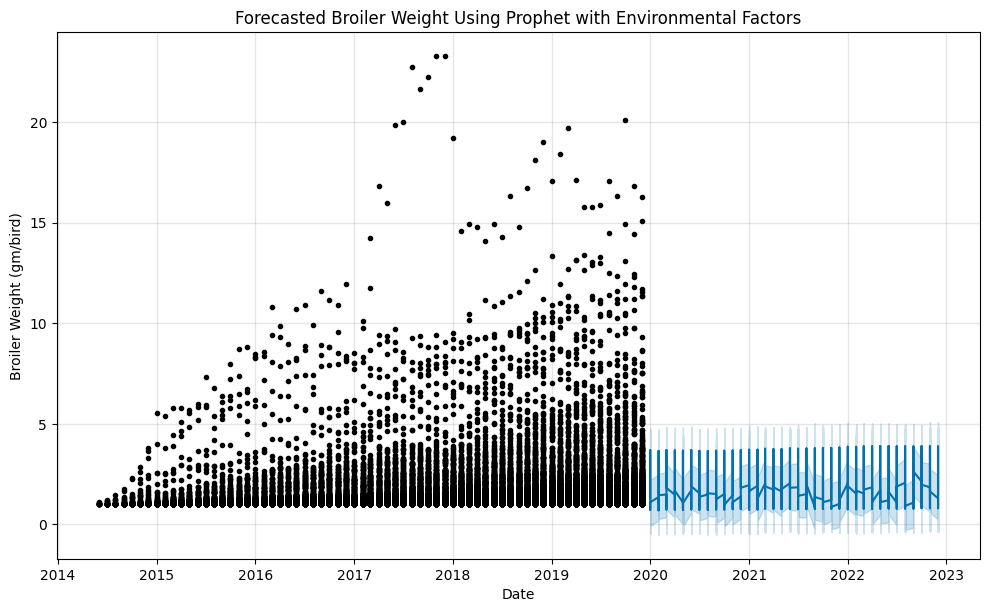

In [67]:
model = Prophet()
model.add_regressor('cluster_nl_encode')
model.add_regressor('che_perc_gdp')
model.add_regressor('insurance_perc_che')
model.add_regressor('price_month')
model.add_regressor('price_unit')
model.add_regressor('public_perc_che')
model.add_regressor('month')

model.fit(train_data)

# # Create future dataframe
# future = model.make_future_dataframe(periods=36,freq='W')

# # Include the future values of the regressors (this is an example, ensure your future values make sense)
# future['avgtemp_c'] = prophet_data['avgtemp_c'].mean()  # Replace with real future values if available
# future['avghumidity'] = prophet_data['avghumidity'].mean()  # Replace with real future values if available
# future['uv'] = prophet_data['uv'].mean()  # Replace with real future values if available

# future = model.make_future_dataframe(periods=365)

forecast = model.predict(X_test)

fig = model.plot(forecast)
plt.title('Forecasted Broiler Weight Using Prophet with Environmental Factors')
plt.xlabel('Date')
plt.ylabel('Broiler Weight (gm/bird)')
plt.show()


Mean Absolute Error (MAE): 0.6767899130904331
Mean Squared Error (MSE): 2.072794982244687
R-squared (R2): -0.05742129641278182


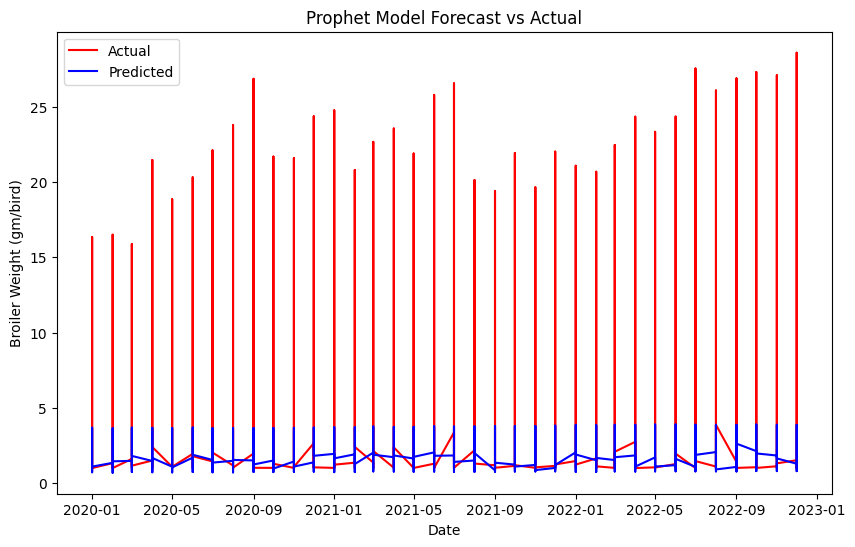

In [71]:

y_pred = forecast['yhat']

# # Evaluate the model's performance
# mae = mean_absolute_error(y_train, y_pred)
# mse = mean_squared_error(y_train, y_pred)
# r2 = r2_score(y_train, y_pred)

# # Display the evaluation metrics
# print(f"Mean Absolute Error (MAE): {mae}")
# print(f"Mean Squared Error (MSE): {mse}")
# print(f"R-squared (R2): {r2}")

# # Optionally, plot the results

# plt.figure(figsize=(10, 6))
# plt.plot(train_data['ds'], y_train, 'r', label='Actual')
# plt.plot(train_data['ds'], y_pred, label='Predicted', color='blue')
# plt.legend()
# plt.title('Prophet Model Forecast vs Actual')
# plt.xlabel('Date')
# plt.ylabel('Broiler Weight (gm/bird)')
# plt.savefig('prophet.png', format='png', dpi=300)
# plt.show()

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Optionally, plot the results

plt.figure(figsize=(10, 6))
plt.plot(test_data['ds'], y_test, 'r', label='Actual')
plt.plot(test_data['ds'], y_pred, label='Predicted', color='blue')
plt.legend()
plt.title('Prophet Model Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Broiler Weight (gm/bird)')
plt.savefig('prophet.png', format='png', dpi=300)
plt.show()
